# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [I Wayan Wedya Diatmika]
- **Email:** [wayanwedyadiatmika@gmail.com]
- **ID Dicoding:** [weddiat]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5 dan PM10) di keempat lokasi dalam beberapa tahun terakhir, dan apakah ada pola musiman yang dapat diidentifikasi?
- Bagaimana pengaruh faktor cuaca (suhu, kecepatan angin, hujan) terhadap tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [216]:
data1_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Aotizhongxin_20130301-20170228.csv")
data1_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [217]:
data2_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Changping_20130301-20170228.csv")
data2_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [218]:
data3_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Dingling_20130301-20170228.csv")
data3_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [219]:
data4_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Dongsi_20130301-20170228.csv")
data4_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [220]:
data5_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Guanyuan_20130301-20170228.csv")
data5_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [221]:
data6_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Gucheng_20130301-20170228.csv")
data6_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [222]:
data7_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Huairou_20130301-20170228.csv")
data7_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [223]:
data8_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Nongzhanguan_20130301-20170228.csv")
data8_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [224]:
data9_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Shunyi_20130301-20170228.csv")
data9_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [225]:
data10_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Tiantan_20130301-20170228.csv")
data10_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [226]:
data11_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Wanliu_20130301-20170228.csv")
data11_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [227]:
data12_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Wanshouxigong_20130301-20170228.csv")
data12_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Mengambil data pada direktori data
- Menampilkan isi data

### Assessing Data

#### Menilai tabel `data1_df`

In [228]:
data1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [229]:
data1_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [230]:
print("Jumlah Duplikasi: ", data1_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data2_df`

In [231]:
data2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [232]:
data2_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [233]:
print("Jumlah Duplikasi: ", data2_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data3_df`

In [234]:
data3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [235]:
data3_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [236]:
print("Jumlah Duplikasi: ", data3_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data4_df`

In [237]:
data4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [238]:
data4_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [239]:
print("Jumlah Duplikasi: ", data4_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data5_df`

In [240]:
data5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [241]:
data5_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [242]:
print("Jumlah Duplikasi: ", data5_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data6_df`

In [243]:
data6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [244]:
data6_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [245]:
print("Jumlah Duplikasi: ", data6_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data7_df`

In [246]:
data7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [247]:
data7_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [248]:
print("Jumlah Duplikasi: ", data7_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data8_df`

In [249]:
data8_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [250]:
data8_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [251]:
print("Jumlah Publikasi: ", data8_df.duplicated().sum())

Jumlah Publikasi:  0


#### Menilai tabel `data9_df`

In [252]:
data9_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [253]:
data9_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [254]:
print("Jumlah Duplikasi: ", data9_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data10_df`

In [255]:
data10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [256]:
data10_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [257]:
print("Jumlah Duplikasi: ", data10_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data11_df`

In [258]:
data11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [259]:
data11_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [260]:
print("Jumlah Duplikasi: ", data11_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data12_df`

In [261]:
data12_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [262]:
data12_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [263]:
print("Jumlah Duplikasi: ", data12_df.duplicated().sum())

Jumlah Duplikasi:  0


**Insight:**
- Menampilkan informasi data
- Mengecek apakah terdapat data yang hilang atau missing value dan mengecek apakah terdapat data duplikat atau tidak

### Cleaning Data

#### Membersihkan tabel `data1_df`

In [264]:
data1_df.dropna(axis=0, inplace=True)
data1_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data2_df`

In [265]:
data2_df.dropna(axis=0, inplace=True)
data2_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data3_df`

In [266]:
data3_df.dropna(axis=0, inplace=True)
data3_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data4_df`

In [267]:
data4_df.dropna(axis=0, inplace=True)
data4_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data5_df`

In [268]:
data5_df.dropna(axis=0, inplace=True)
data5_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data6_df`

In [269]:
data6_df.dropna(axis=0, inplace=True)
data6_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data7_df`

In [270]:
data7_df.dropna(axis=0, inplace=True)
data7_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data8_df`

In [271]:
data8_df.dropna(axis=0, inplace=True)
data8_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data9_df`

In [272]:
data9_df.dropna(axis=0, inplace=True)
data9_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data10_df`

In [273]:
data10_df.dropna(axis=0, inplace=True)
data10_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data11_df`

In [274]:
data11_df.dropna(axis=0, inplace=True)
data11_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data12_df`

In [275]:
data12_df.dropna(axis=0, inplace=True)
data12_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- melakukan dropping data yang missing value, dikarenakan data yang didapatkan sangat banyak sehingga saya rasa tidak akan mengalami kerugian jika melakukan dropping

## Exploratory Data Analysis (EDA)

### Explore ...

In [276]:
data1_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.00000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815,31815.000000,31815
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581,NaN,31815
mean,17899.423857,2014.714914,6.401886,15.578564,11.624800,81.86363,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,NaN,1.720471,NaN
std,10058.429849,1.162536,3.416847,8.794954,6.926874,80.44949,93.718017,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,0.837489,NaN,1.204240,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.00000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,9415.500000,2014.000000,3.000000,8.000000,6.000000,22.00000,37.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,0.000000,NaN,0.900000,NaN
50%,18093.000000,2015.000000,6.000000,15.000000,12.000000,58.00000,86.000000,8.000000,53.000000,800.000000,42.000000,14.800000,1011.200000,4.000000,0.000000,NaN,1.400000,NaN
75%,26590.500000,2016.000000,9.000000,23.000000,18.000000,114.00000,154.000000,21.000000,82.000000,1500.000000,82.000000,23.400000,1020.000000,15.700000,0.000000,NaN,2.200000,NaN


In [277]:
data1_df.groupby(by="station").agg({
    "No": "nunique",  
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"] 
})

No  PM2.5                            PM10                   \
             nunique    max  min      mean       std    max  min        mean   
station                                                                        
Aotizhongxin   31815  713.0  3.0  81.86363  80.44949  948.0  2.0  109.120685   

                         
                    std  
station                  
Aotizhongxin  93.718017

**Insight:**
- mengetahui bahwa dataset ini berisi data kualitas udara dengan pengukuran dari berbagai polutan dan kondisi cuaca yang relevan pada waktu tertentu.
- memeriksa statistik deskriptif ini dengan melihat apakah kualitas udara cukup konsisten atau sangat bervariasi antar waktu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [278]:
import os
import pandas as pd

selected_stations = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
]

data_dir = r"C:\Users\Asus\Desktop\submission\data"  

df_list = []
for file in selected_stations:
    file_path = os.path.join(data_dir, file) 
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

df.drop(columns=["No"], inplace=True)

df["date"] = pd.to_datetime(df["year"] * 10000 + df["month"] * 100 + df["day"], format="%Y%m%d")
df["datetime"] = df["date"] + pd.to_timedelta(df["hour"], unit='h')
df.drop(columns = ["year", "month", "day", "hour", "date"], inplace = True)

numeric_cols = df.select_dtypes(include=['number']).columns

df[numeric_cols] = df.groupby("station")[numeric_cols].transform(lambda x: x.fillna(x.median()))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     140256 non-null  float64       
 1   PM10      140256 non-null  float64       
 2   SO2       140256 non-null  float64       
 3   NO2       140256 non-null  float64       
 4   CO        140256 non-null  float64       
 5   O3        140256 non-null  float64       
 6   TEMP      140256 non-null  float64       
 7   PRES      140256 non-null  float64       
 8   DEWP      140256 non-null  float64       
 9   RAIN      140256 non-null  float64       
 10  wd        139817 non-null  object        
 11  WSPM      140256 non-null  float64       
 12  station   140256 non-null  object        
 13  datetime  140256 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 15.0+ MB


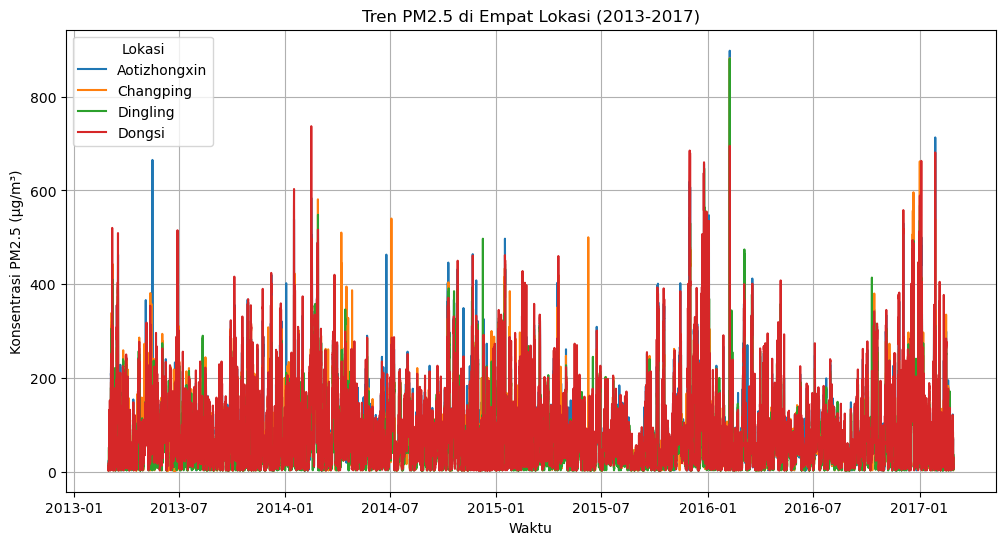

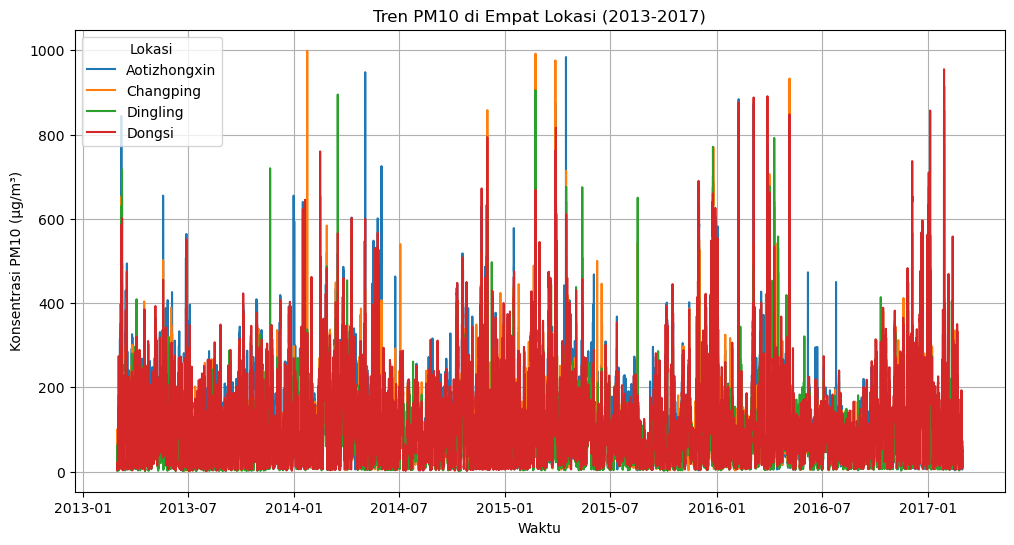

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setel ukuran figure untuk visualisasi
plt.figure(figsize=(12, 6))

# Plot tren PM2.5 dari waktu ke waktu
sns.lineplot(data=df, x="datetime", y="PM2.5", hue="station", errorbar=None) #errorbar replaces ci
plt.title("Tren PM2.5 di Empat Lokasi (2013-2017)")
plt.xlabel("Waktu")  # Change x-axis label
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

# Plot tren PM10 dari waktu ke waktu
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="datetime", y="PM10", hue="station", errorbar=None) #errorbar replaces ci
plt.title("Tren PM10 di Empat Lokasi (2013-2017)")
plt.xlabel("Waktu") # Change x-axis label
plt.ylabel("Konsentrasi PM10 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

### Pertanyaan 2:

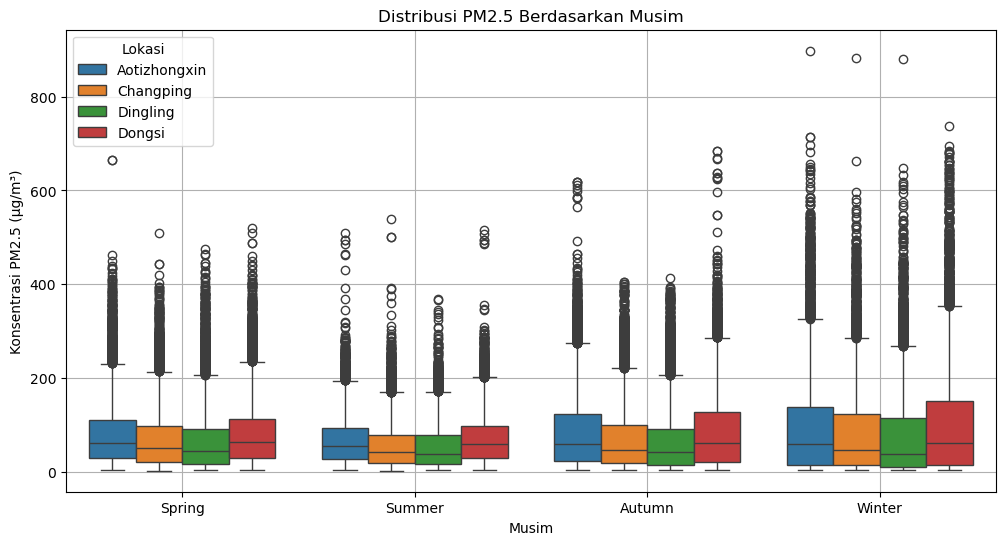

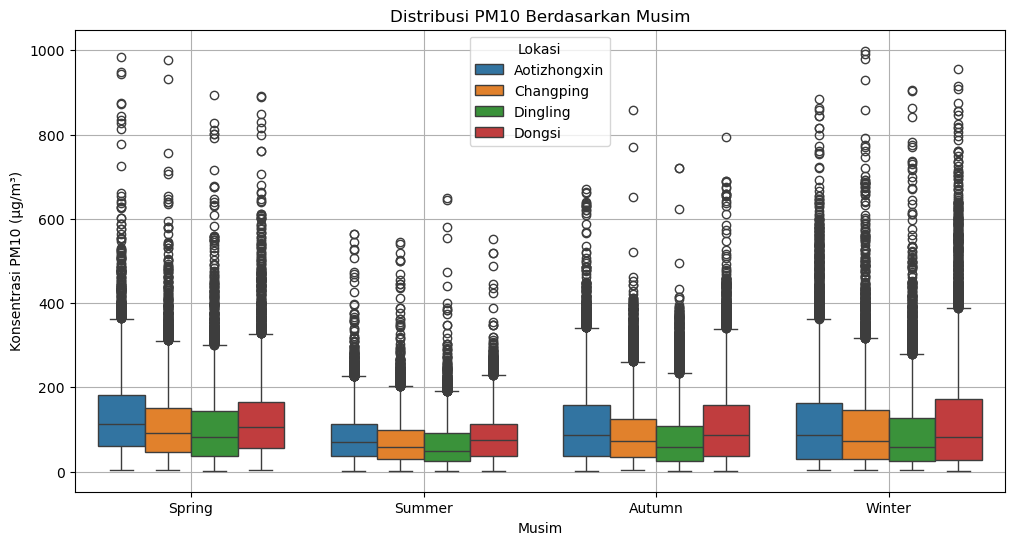

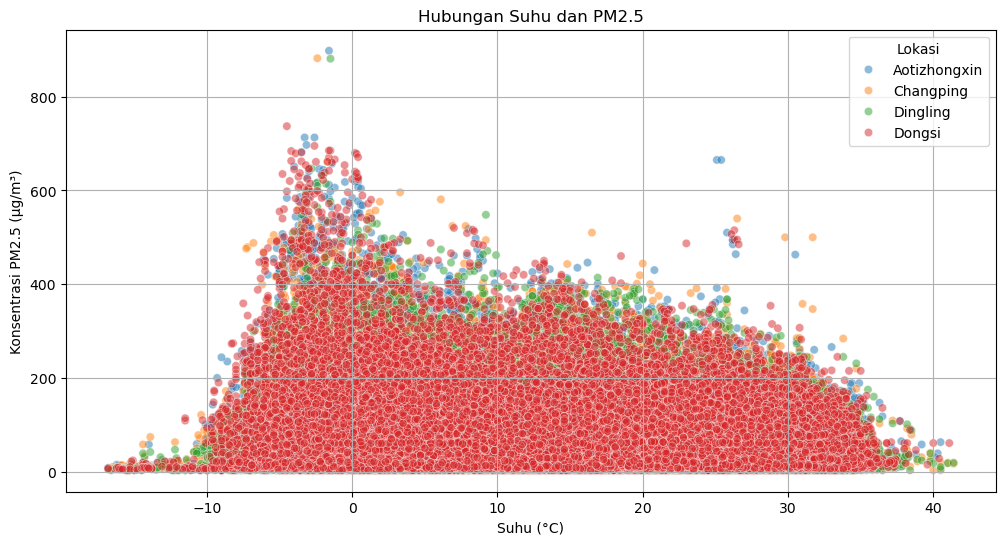

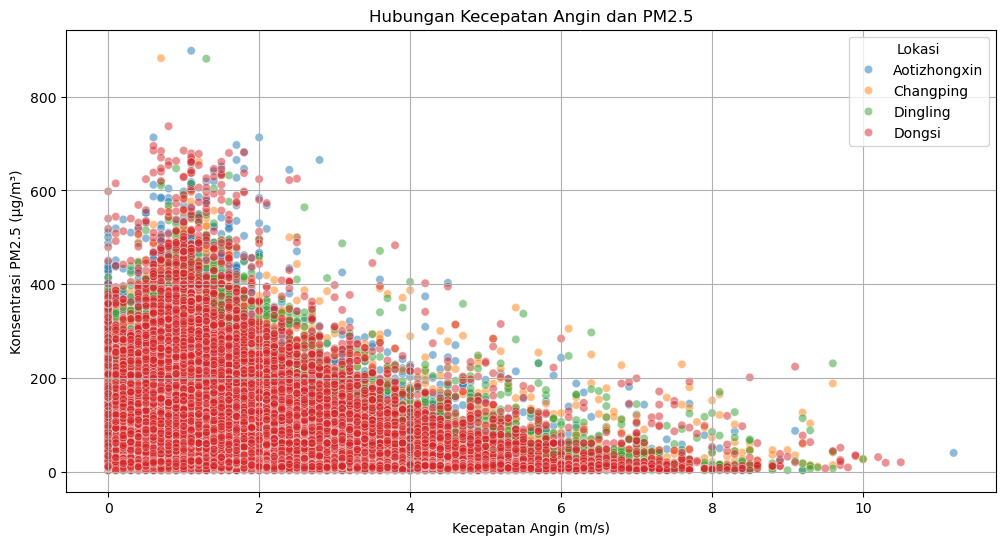

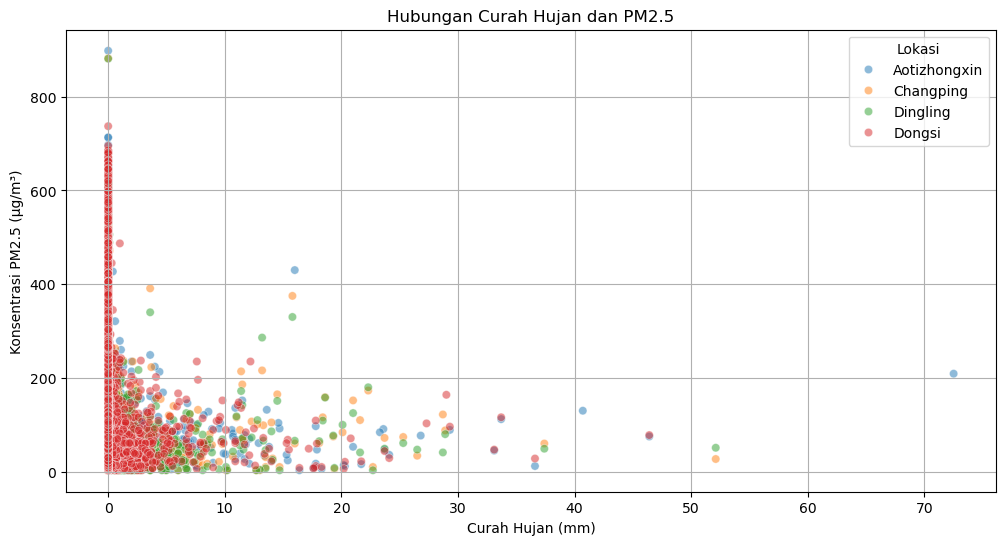

In [280]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["month"] = df["datetime"].dt.month

df["season"] = df["month"].apply(get_season)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="season", y="PM2.5", hue="station")
plt.title("Distribusi PM2.5 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="season", y="PM10", hue="station")
plt.title("Distribusi PM10 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Konsentrasi PM10 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="TEMP", y="PM2.5", hue="station", alpha=0.5)
plt.title("Hubungan Suhu dan PM2.5")
plt.xlabel("Suhu (°C)")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="WSPM", y="PM2.5", hue="station", alpha=0.5)
plt.title("Hubungan Kecepatan Angin dan PM2.5")
plt.xlabel("Kecepatan Angin (m/s)")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="RAIN", y="PM2.5", hue="station", alpha=0.5)
plt.title("Hubungan Curah Hujan dan PM2.5")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

**Insight:**
- Menampilkan hasil Visualisasi dari kedua pertanyaan yang ada

## Conclusion

- Polusi udara di berbagai lokasi cenderung menunjukkan fluktuasi musiman dan tren waktu yang dipengaruhi oleh berbagai faktor, baik lokal maupun global. Identifikasi pola musiman menunjukkan bahwa polusi udara bisa meningkat di musim dingin dan menurun pada musim hujan atau musim panas.
- Faktor cuaca, seperti suhu, kecepatan angin, dan curah hujan, berperan sangat penting dalam mempengaruhi konsentrasi polutan seperti PM2.5 dan PM10. Suhu rendah dan kecepatan angin rendah sering kali berhubungan dengan tingkat polusi udara yang lebih tinggi, sedangkan hujan dapat secara signifikan mengurangi tingkat polusi dengan membersihkan udara.